In [19]:
# %matplotlib notebook  # not interactive...
%matplotlib widget # this works!

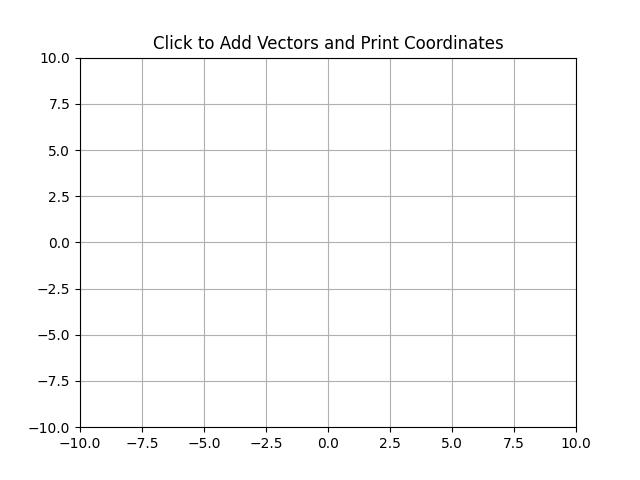

Clicked at coordinates: (0.36, 6.52)
Clicked at coordinates: (-3.95, 1.54)
Clicked at coordinates: (2.30, -3.87)
Clicked at coordinates: (3.02, 7.44)
Clicked at coordinates: (4.52, 0.62)
Clicked at coordinates: (-1.33, -7.66)
Clicked at coordinates: (-6.49, -2.03)
Clicked at coordinates: (3.39, 3.76)
Clicked at coordinates: (3.75, 1.75)
Clicked at coordinates: (2.30, 1.70)
Clicked at coordinates: (6.94, 6.14)


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a Cartesian plot
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_title('Click to Add Vectors and Print Coordinates')
ax.grid(True)

# Function to handle mouse clicks
def onclick(event):
    if event.inaxes is not None:
        # Get the x and y coordinates from the event
        x, y = event.xdata, event.ydata
        
        # Print the coordinates
        print(f"Clicked at coordinates: ({x:.2f}, {y:.2f})")
        
        # Plot a vector from the origin to the clicked position
        ax.arrow(0, 0, x, y, head_width=0.5, head_length=0.5, fc='r', ec='r')

        # Redraw the plot
        fig.canvas.draw_idle()

# Connect the click event to the handler
fig.canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()


### this vector plot works!
* but r and theta are NOK..

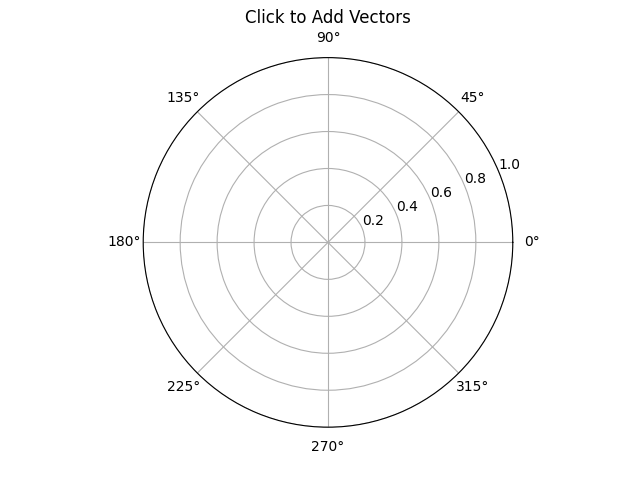

0.5711741695669259 1.293003120478882
0.08100940402160416 6.28678297592845
1.5484966716520303 0.7632873065907771
1.5620517647786094 0.9308023495714745
1.562986219831197 0.9849076603797727
0.2948727535147269 1.6650280179410986
0.15569427110657405 3.175608890070264
0.23736524842807813 3.2219331241026996
0.3071174785800048 3.2935262966440266
0.01490904795466151 3.317901023252027


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget
# this setting works!

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title('Click to Add Vectors')

# Set static radial limits to ensure consistent scaling
ax.set_ylim(0, 1)

# Function to handle mouse clicks
def onclick(event):
    if event.inaxes is not None:
        # Transform the click location from screen to data coordinates in polar
        # Here, we use event.xdata and event.ydata which are already in data coordinates
        if event.xdata is not None and event.ydata is not None:
            r = np.sqrt(event.xdata**2 + event.ydata**2)
            theta = np.arctan2(event.ydata, event.xdata)
            print(theta, r)

            # Clear previous vectors to avoid clutter
            ax.cla()
            ax.set_title('Click to Add Vectors')
            ax.set_ylim(0, 1)  # Reset radial limits after clearing

            # Compute Cartesian components for the vector
            u = r * np.cos(theta)  # Horizontal component
            v = r * np.sin(theta)  # Vertical component

            # Plot the vector from the origin to the point
            ax.quiver(0, 0, u, v, angles='xy', scale_units='xy', scale=1, color='r', pivot='tail')

            # Redraw the plot
            fig.canvas.draw_idle()

# Connect the click event to the handler
fig.canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()


### .. rounding trials, 
* this polar coordinate not working yet, 
* try cartesian after this...

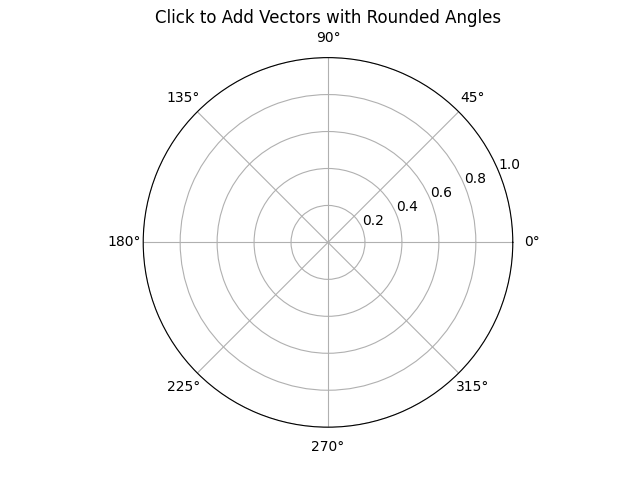

Raw theta (radians): 6.276591996128766 Raw r: 0.4924349458900481
Adjusted theta (radians): 6.283185307179586 Adjusted r: 0.4924349458900481
Raw theta (radians): 0.04831402097077486 Raw r: 0.4929995212483736
Adjusted theta (radians): 0.0 Adjusted r: 0.4929995212483736
Raw theta (radians): 0.12083697915707248 Raw r: 0.15262810166779273
Adjusted theta (radians): 0.0 Adjusted r: 0.15262810166779273
Raw theta (radians): 5.9640457129073 Raw r: 0.13107754027459656
Adjusted theta (radians): 5.759586531581287 Adjusted r: 0.13107754027459656
Raw theta (radians): 6.128547470578952 Raw r: 0.37240918646379867
Adjusted theta (radians): 6.283185307179586 Adjusted r: 0.37240918646379867
Raw theta (radians): 0.07834399230419642 Raw r: 0.5807857855597304
Adjusted theta (radians): 0.08726646259971647 Adjusted r: 0.5807857855597304
Raw theta (radians): 6.065045835311937 Raw r: 0.6651126332733055
Adjusted theta (radians): 6.1086523819801535 Adjusted r: 0.6651126332733055


In [3]:
%matplotlib widget 
# this is need for interactivity and works!
import numpy as np
import matplotlib.pyplot as plt

def round_angle(theta, precision):
    """ Round angle in radians to nearest precision in degrees. """
    theta_deg = np.degrees(theta)  # Convert radians to degrees
    rounded_deg = round(theta_deg / precision) * precision
    return np.radians(rounded_deg)  # Convert degrees back to radians

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title('Click to Add Vectors with Rounded Angles')

# Set static radial limits to ensure consistent scaling
ax.set_ylim(0, 1)

# Function to handle mouse clicks
def onclick(event):
    if event.inaxes is not None:
        # Assuming event.xdata is theta (in radians) and event.ydata is r
        theta = event.xdata
        r = event.ydata

        print("Raw theta (radians):", theta, "Raw r:", r)

        # Apply rounding based on radial regions
        if r > 0.8:
            theta = round_angle(theta, 1)
        elif r > 0.5:
            theta = round_angle(theta, 5)
        else:
            theta = round_angle(theta, 30)

        print("Adjusted theta (radians):", theta, "Adjusted r:", r)

        # Clear previous vectors to avoid clutter
        ax.cla()
        ax.set_title('Click to Add Vectors with Rounded Angles')
        ax.set_ylim(0, 1)  # Reset radial limits after clearing

        # Compute Cartesian components for the vector
        u = r * np.cos(theta)  # Horizontal component
        v = r * np.sin(theta)  # Vertical component

        # Plot the vector from the origin to the point
        ax.quiver(0, 0, u, v, angles='xy', scale_units='xy', scale=1, color='r', pivot='tail')

        # Redraw the plot
        fig.canvas.draw_idle()

# Connect the click event to the handler
fig.canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()


### angle rounding in cartesian iput works:

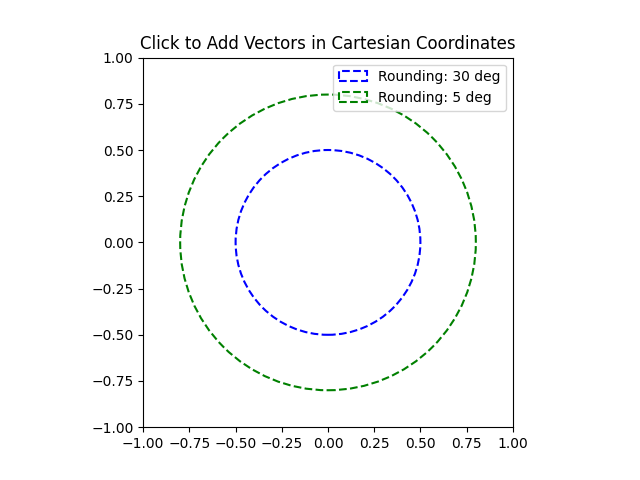

Input X: 0.3030303030303032 Input Y: 0.14826839826839833
Calculated theta (deg): 26.07184287599454 Calculated r: 0.3373586851997645
Adjusted theta (deg): 29.999999999999996 Adjusted r: 0.3373586851997645
Input X: 0.5844155844155847 Input Y: -0.04112554112554112
Calculated theta (deg): -4.025289579827384 Calculated r: 0.5858608072235912
Adjusted theta (deg): -5.0 Adjusted r: 0.5858608072235912
Input X: 0.8116883116883118 Input Y: 0.3160173160173161
Calculated theta (deg): 21.27262173590349 Calculated r: 0.8710366578704998
Adjusted theta (deg): 21.0 Adjusted r: 0.8710366578704998
Input X: 0.059523809523809756 Input Y: 0.14826839826839833
Calculated theta (deg): 68.12652038874873 Calculated r: 0.1597704660608561
Adjusted theta (deg): 59.99999999999999 Adjusted r: 0.1597704660608561
Input X: -0.04870129870129847 Input Y: 0.15367965367965386
Calculated theta (deg): 107.58348187776636 Calculated r: 0.16121182478432358
Adjusted theta (deg): 119.99999999999999 Adjusted r: 0.16121182478432358
I

In [2]:
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt

# Function to round angle to nearest specified degree precision
def round_angle(theta, precision):
    theta_deg = np.degrees(theta)  # Convert radians to degrees
    rounded_deg = round(theta_deg / precision) * precision
    return np.radians(rounded_deg)  # Convert degrees back to radians

# Create a Cartesian plot
fig, ax = plt.subplots()
ax.set_title('Click to Add Vectors in Cartesian Coordinates')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

# Draw circles to indicate radial rounding limits
circle1 = plt.Circle((0, 0), 0.5, color='blue', fill=False, linestyle='--', linewidth=1.5, label='Rounding: 30 deg')
circle2 = plt.Circle((0, 0), 0.8, color='green', fill=False, linestyle='--', linewidth=1.5, label='Rounding: 5 deg')
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.legend(loc='upper right')

# Function to handle mouse clicks
def onclick(event):
    if event.inaxes is not None:
        # Directly use xdata and ydata as Cartesian coordinates
        x = event.xdata
        y = event.ydata

        print("Input X:", x, "Input Y:", y)

        # Calculate theta and r from x and y for angle adjustment
        r = np.sqrt(x**2 + y**2)
        theta = np.arctan2(y, x)

        print("Calculated theta (deg):", np.degrees(theta), "Calculated r:", r)

        # Apply rounding based on radial regions
        if r > 0.8:
            theta = round_angle(theta, 1)
        elif r > 0.5:
            theta = round_angle(theta, 5)
        else:
            theta = round_angle(theta, 30)

        print("Adjusted theta (deg):", np.degrees(theta), "Adjusted r:", r)

        # Clear previous vectors to avoid clutter
        ax.cla()
        ax.set_title('Click to Add Vectors in Cartesian Coordinates')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_aspect('equal')

        # Redraw circles for clarity after clearing
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.legend(loc='upper right')

        # Adjust x, y based on adjusted theta and r for plotting
        x_adj = r * np.cos(theta)
        y_adj = r * np.sin(theta)

        # Plot the vector from the origin to the adjusted point
        ax.arrow(0, 0, x_adj, y_adj, head_width=0.05, head_length=0.1, fc='r', ec='r')

        # Redraw the plot
        fig.canvas.draw_idle()

# Connect the click event to the handler
fig.canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()


### mouse tracking added, erro if outside area...
14.6.2024 continue in next mouse_control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def round_angle(theta, precision):
    """ Round angle in radians to nearest precision in degrees. """
    theta_deg = np.degrees(theta)  # Convert radians to degrees
    rounded_deg = round(theta_deg / precision) * precision
    return np.radians(rounded_deg)  # Convert degrees back to radians

def update_vector(x, y, ax):
    """ Update the vector based on the provided x and y coordinates. """
    # Calculate theta and r from x and y for angle adjustment
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    # Apply rounding based on radial regions
    if r > 0.8:
        theta = round_angle(theta, 1)
    elif r > 0.5:
        theta = round_angle(theta, 5)
    else:
        theta = round_angle(theta, 30)

    # Clear previous vectors to avoid clutter
    ax.cla()
    ax.set_title('Click and Drag to Add Vectors in Cartesian Coordinates')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')

    # Redraw circles for clarity after clearing
    circle1 = plt.Circle((0, 0), 0.5, color='blue', fill=False, linestyle='--', linewidth=1.5, label='Rounding: 30 deg')
    circle2 = plt.Circle((0, 0), 0.8, color='green', fill=False, linestyle='--', linewidth=1.5, label='Rounding: 5 deg')
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.legend(loc='upper right')

    # Adjust x, y based on adjusted theta and r for plotting
    x_adj = r * np.cos(theta)
    y_adj = r * np.sin(theta)

    # Plot the vector from the origin to the adjusted point
    ax.arrow(0, 0, x_adj, y_adj, head_width=0.05, head_length=0.1, fc='r', ec='r')

    # Redraw the plot
    fig.canvas.draw_idle()

# Create a Cartesian plot
fig, ax = plt.subplots()
ax.set_title('Click and Drag to Add Vectors in Cartesian Coordinates')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

# Connect event handlers for mouse click and drag
fig.canvas.mpl_connect('button_press_event', lambda event: update_vector(event.xdata, event.ydata, ax))
fig.canvas.mpl_connect('motion_notify_event', lambda event: update_vector(event.xdata, event.ydata, ax) if event.button == 1 else None)

# Show the plot
plt.show()


In [6]:
from bokeh.plotting import figure, show
from bokeh.models import Arrow, NormalHead, ColumnDataSource, CustomJS
from bokeh.layouts import layout
from bokeh.events import MouseMove, Tap
from bokeh.io import output_notebook

import numpy as np

output_notebook()  # Set up Bokeh to output in the notebook

def round_angle(theta, precision):
    """ Round angle in radians to nearest precision in degrees, returns radians. """
    theta_deg = np.degrees(theta)
    rounded_deg = round(theta_deg / precision) * precision
    return np.radians(rounded_deg)

# Create a figure
p = figure(title="Click and Drag to Add Vectors in Cartesian Coordinates",
           x_range=(-1, 1), y_range=(-1, 1),
           tools="pan,wheel_zoom,reset,save",
           sizing_mode="stretch_width", height=400)

# Add circles for radial boundaries
p.circle(0, 0, radius=0.5, fill_color=None, line_color="blue", line_dash="dashed", line_width=1.5)
p.circle(0, 0, radius=0.8, fill_color=None, line_color="green", line_dash="dashed", line_width=1.5)

# Add a ColumnDataSource to hold the vector data
source = ColumnDataSource(data=dict(x=[0], y=[0], x_end=[0], y_end=[0]))

# Add an arrow glyph
p.add_layout(Arrow(end=NormalHead(fill_color="red", size=10), 
                   x_start='x', y_start='y', x_end='x_end', y_end='y_end', source=source,
                   line_color="red"))

# JavaScript to update the vector on click and mouse move
code = """
    const data = source.data;
    const r = Math.sqrt(cb_obj.x**2 + cb_obj.y**2);
    let theta = Math.atan2(cb_obj.y, cb_obj.x);
    if (r > 0.8) {
        theta = round_angle(theta, 1);
    } else if (r > 0.5) {
        theta = round_angle(theta, 5);
    } else {
        theta = round_angle(theta, 30);
    }
    data.x_end = [r * Math.cos(theta)];
    data.y_end = [r * Math.sin(theta)];
    data.x = [0];
    data.y = [0];
    source.change.emit();
"""

# Function to be used in CustomJS for rounding angles
round_function = CustomJS(code="""
    function round_angle(theta, precision) {
        const theta_deg = theta * (180 / Math.PI);
        const rounded_deg = Math.round(theta_deg / precision) * precision;
        return rounded_deg * (Math.PI / 180);
    }
    return round_angle(theta, precision);
""")

# Attach the CustomJS to both mouse move and tap events
p.js_on_event(MouseMove, CustomJS(args=dict(source=source, round_angle=round_function), code=code))
p.js_on_event(Tap, CustomJS(args=dict(source=source, round_angle=round_function), code=code))

# Layout and show
show(layout([p]))


Loading BokehJS ...